### 1. Required Libraries

In [3]:
%pip install qiskit qiskit-machine-learning pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### 2. Data Preprocessing

##### 2.1 Loading and Inspecting the Data

In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv(r'BankSim\bs140513_032310.csv')

# Display shape and head
print(df.shape)
display(df.head())

(594643, 10)


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


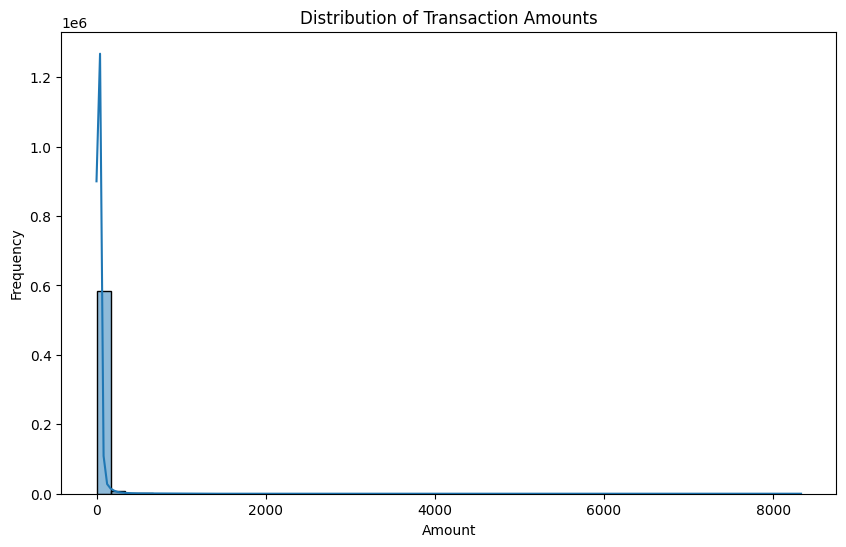

In [5]:
# Plot 1: Distribution of Transaction Amounts
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

##### 2.2 Select Relevant Features
<ol>
<li>age, gender, category, amount (features)</li>
<li>fraud (target)</li>
</ol>

In [6]:
df = df[['age', 'gender', 'category', 'amount', 'fraud']]

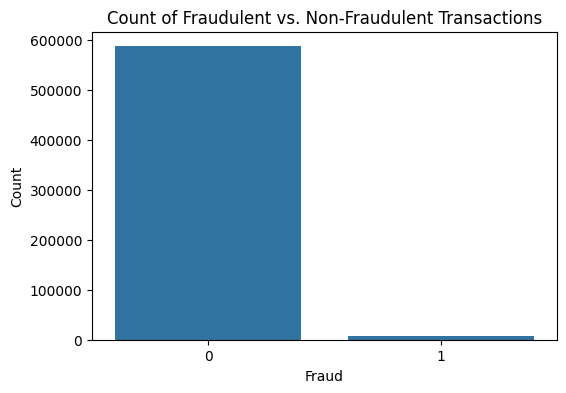

In [7]:
# Plot 2: Count of Fraudulent vs. Non-Fraudulent Transactions
plt.figure(figsize=(6, 4))
sns.countplot(x='fraud', data=df)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

##### 2.3 Clean and Encode Features

In [8]:
from sklearn.preprocessing import LabelEncoder

# Convert age categories to integers
# Clean 'age' column: remove quotes and replace 'U' with 0, then convert to int
df['age'] = df['age'].astype(str).str.strip("'\"")  # Remove quotes
df['age'] = df['age'].replace({'U': '0'})           # Replace 'U' with '0'
df['age'] = df['age'].astype(int)                   # Convert to int

# Encode categorical variables
le_gender = LabelEncoder()
le_category = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])
df['category'] = le_category.fit_transform(df['category'])

##### 2.4 Normalize the Amount Column

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['amount'] = scaler.fit_transform(df[['amount']])

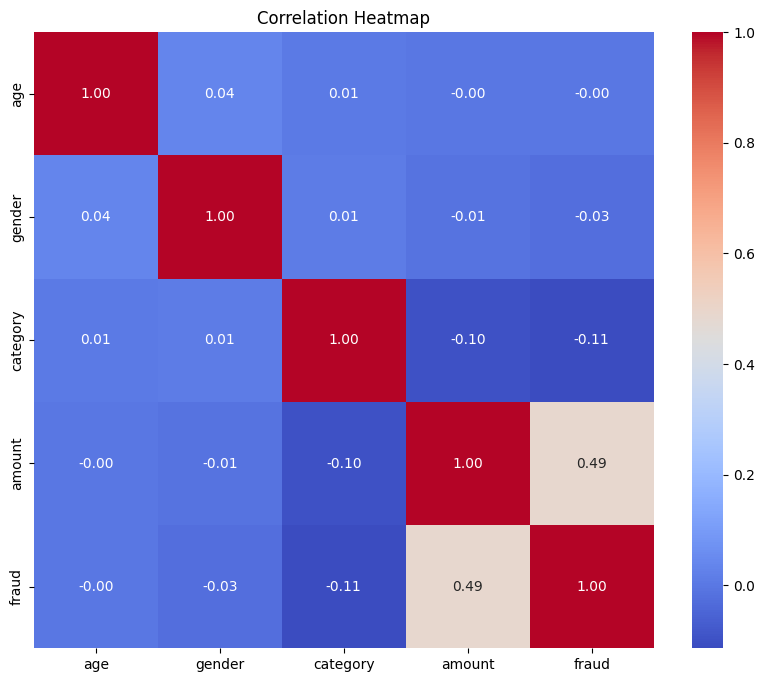

In [10]:
# Plot 3: Correlation Heatmap (after encoding + normalization)
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# Plot 4: Boxplot of Amount by Fraud Status
# plt.figure(figsize=(8, 6))
# sns.boxplot(x='fraud', y='amount', data=df)
# plt.title('Transaction Amount by Fraud Status')
# plt.xlabel('Fraud')
# plt.ylabel('Amount')
# plt.show()

##### 2.5 Balance the Dataset
Quantum models handle small datasets better. We'll take 100 fraud and 100 non-fraud samples for balance:

In [12]:
fraud = df[df['fraud'] == 1].sample(n=100, random_state=42)
non_fraud = df[df['fraud'] == 0].sample(n=100, random_state=42)

df_balanced = pd.concat([fraud, non_fraud]).sample(frac=1, random_state=42)  # shuffle

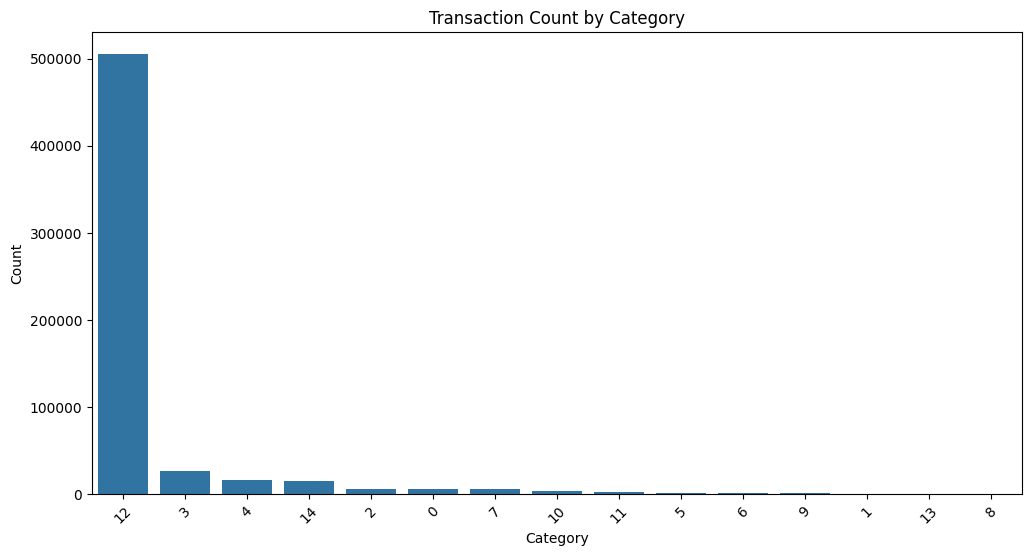

In [13]:
# Plot 5: Count of transactions by Category
plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=df, order=df['category'].value_counts().index)
plt.title('Transaction Count by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 2.6 Split Into Features and Labels

In [14]:
X = df_balanced.drop('fraud', axis=1)
y = df_balanced['fraud']

##### 2.7 Train-Test Split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


### 3: Feature Encoding for Quantum Circuits
<p>Quantum models don’t take arbitrary input like classical models. Instead, classical data must be encoded into quantum states using quantum feature maps.</p>
<h4>What We'll Do:</h4>
<ul>
    <li>Select features: you already have 4 (age, gender, category, amount)</li>
    <li>Choose a Feature Map: We'll use ZFeatureMap first (best performance per paper).</li>
    <li>Scale features into the domain expected by quantum circuits.</li>
</ul>

##### 3.1 Normalize Feature Vectors
Quantum circuits work best when inputs are in the range [0, π]. You can scaling X_train and X_test:

In [16]:
import numpy as np

# Scale features to [0, π] for use with feature maps
X_train_scaled = X_train.to_numpy() * np.pi
X_test_scaled = X_test.to_numpy() * np.pi

##### 3.2 Import and Create a Feature Map

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


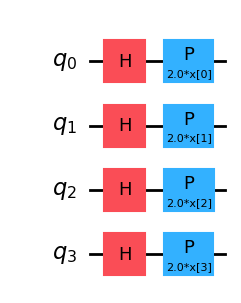

In [17]:
%pip install pylatexenc
from qiskit.circuit.library import ZFeatureMap

# Number of qubits = number of features
num_qubits = X_train.shape[1]

# Use ZFeatureMap (simple + effective for binary classification)
feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=1)
feature_map.decompose().draw('mpl')  # Optional: visualize the circuit

### 4: Implement Quantum Support Vector Classifier (QSVM)

##### 4.1 Import QSVM-Related Modules

In [2]:
from qiskit_machine_learning.kernels.algorithms import QuantumKernel


ImportError: cannot import name 'Sampler' from 'qiskit.primitives' (c:\Project\venv\Lib\site-packages\qiskit\primitives\__init__.py)